Auteurs: Guillaume Palumbo & Laurie Stevens <br>
Date: 5 décembre 2016 <br>
Titre: Reaction diffusion

Nous allons ici nous pencher sur une réaction de diffusion de deux espèces chimiques différentes, U et V qui seront principalement caractérisée par leur concentration respective à travers le temps et l'espace. <br>
Pour ce faire, nous allons utiliser le modèle de Gray-Scott qui peut être résumé par 3 simples règles: <br>
1) Chaque espèce chimique se diffuse dans l'espace selon une constante de diffusion propre <br>
2) Deux particules V peuvent transformer une particule U en V, c'est à dire que 2V + U -> 3V <br>
3) Il y a un taux de disparition des V et un taux de création des U qui sont tous les deux fixes, afin d'éviter une surpopulation de V ou une disparition totale des U. <br>
<br>
L'évolution temporelle d'un tel système est définie par deux équations différentielles du second ordre, une pour les U et une pour les V. Les différents termes de ces équations différentielles prennent bien sûr en considération les 3 règles du modèle de Gray-Scott citées ci-dessus. <br>

Avant toute chose, nous allons tout d'abord importer les librairies nécéssaires au code, ainsi que les valeurs initiales (t=0s) des concentrations de U et V (qui sont classées dans les matrices U et V), et fixer les valeurs qui définissent notre système.

In [3]:
import numpy as np
import matplotlib.pyplot as pyplot
%matplotlib inline
from matplotlib import rcParams, cm
np.set_printoptions(threshold=np.inf)
uvinitial = np.load('./uvinitial.npz')
U = uvinitial['U']
V = uvinitial['V']

n = 192 #nombre de points qui caractérise le système sur les axes x et y, dimension des matrices U et V
Du, Dv = 0.00016, 0.00008 #cstes de diffusion sptaiale de U et V
F, k = 0.035, 0.065 #cstes décrivant les taux de suppression et de création de U et V
delta = 5/(n-1) #pas spatial en x et en y
T = 8000 #temps final
dt = (0.9*(delta**2))/(4*max(Du,Dv)) #pas temporel
nt = int(T/dt) #nombre d'itérations nécéssaires

Notre but est bien entendu de voir l'avancée temporelle de ce système. <br>
Pour ce faire, nous allons discrétiser nos équations différentielles, de manière centrale pour l'espace et de manière "forward" pour le temps. <br>
La seule inconnue reste alors la concentration u (respectivement v) au temps suivant, il serait donc suffisant donc d'appliquer cela sur toutes les valeurs de la matrice u (resp. v). Or, il ne faut pas appliquer cette méthode sur les bords. <br>
En effet, nous utiliser ici des conditions de Neumann à valeur zéro sur tous les bords du domaine. Ce qui revient donc à dire, que chaque valeur sur le contour sont égales à la valeur qui la précède dans leur colonne ou leur ligne, selon qu'on se trouve respectivement sur le bord supérieur/inférieur ou sur le bord gauche/droit. <br>
C'est ce qui est calculé dans la fonction ci-dessous pour la matrice U. <br>

In [4]:
def next_matrixU(U,V):
	next_U=np.zeros((n,n))
	next_U[1:-1,1:-1]=U[1:-1,1:-1]+(dt*(((Du/(delta**2))*(U[2:,1:-1]-(2*U[1:-1,1:-1])+U[:-2,1:-1]+U[1:-1,2:]-(2*U[1:-1,1:-1])+U[1:-1,:-2]))-(U[1:-1,1:-1]*((V[1:-1,1:-1])**2))+(F*(1-U[1:-1,1:-1]))))
	next_U[1:-1,0]=next_U[1:-1,1]
	next_U[1:-1,-1]=next_U[1:-1,-2]
	next_U[-1,:]=next_U[-2,:]
	next_U[0,:]=next_U[1,:]
	return next_U

Et ci-dessous pour la matrice V. <br>

In [5]:
def next_matrixV(V,U):
	next_V=np.zeros((n,n))
	next_V[1:-1,1:-1]=V[1:-1,1:-1]+(dt*((((Dv)/(delta**2))*(V[2:,1:-1]-(2*V[1:-1,1:-1])+V[:-2,1:-1]+V[1:-1,2:]-(2*V[1:-1,1:-1])+V[1:-1,:-2]))+(U[1:-1,1:-1]*((V[1:-1,1:-1])**2))-((F+k)*V[1:-1,1:-1])))
	next_V[0,1:-1]=next_V[1,1:-1]
	next_V[-1,1:-1]=next_V[-2,1:-1]
	next_V[:,-1]=next_V[:,-2]
	next_V[:,0]=next_V[:,1]
	return next_V

Nous pouvons maintenant écrire la boucle générale de la fonction, qui consiste tout simplement à donner les matrices U et V aux fonctions qui calcule leurs valeurs au temps suivant et qui remplace ensuite les matrices U et V par les nouvelles matrices que l'on vient de calculer. <br>

In [9]:
for i in range(nt):
    U,V=next_matrixU(U,V),next_matrixV(V,U)

Et il nous reste finalement juste à afficher les valeurs souhaitées: une valeur toutes les 40 valeurs de la 100e ligne. <br>

In [10]:
print(U[100,::40])

[ 0.89216605  0.62509301  0.73082369  0.77934618  0.89343152]


Ces valeurs ont été vérifiées sur le site du numerical mooc et sont correctes. <br>

Nous allons finalement sortir un graphique des valeurs finales de U et puis de V. <br>

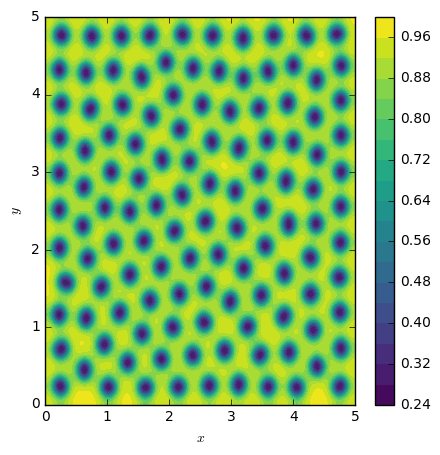

In [11]:
x = np.linspace(0.,5.,n)
y = np.linspace(0.,5.,n)


pyplot.figure(figsize=(5,5))
pyplot.contourf(x,y,U,20,cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();

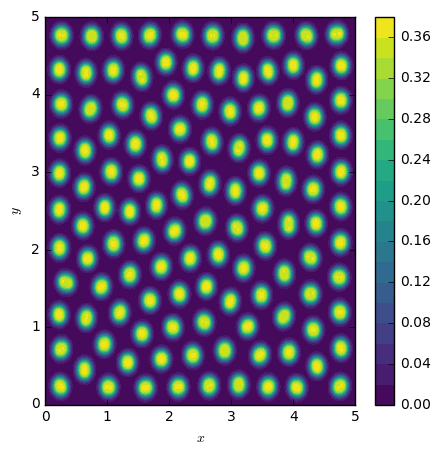

In [12]:
pyplot.figure(figsize=(5,5))
pyplot.contourf(x,y,V,20,cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();

Comme on pouvait s'y attendre au vu des règles du modèle de Gray-Scott, les hautes concentrations de U et de V se trouvent au même endroit, vu que la rencontre entre deux particules V et une particules U va créer une nouvelle particule V. <br> 
Les particules V sont en moins grande concentration tout simplement parce qu'elle était beaucoup moins nombreuses dans les valeurs initiales et que les taux constants de suppression et création contribuent à garder une quantité supérieure de U par rapport à la quantité de V. <br>